In [ ]:
import requests
from bs4 import  BeautifulSoup
dataset = []

main_url = 'https://www.sastoramro.com'
for p in range(1,402):
    res = requests.get('https://www.sastoramro.com/ads-search.html?c=3&s=&p='+str(p))
    if res.status_code != 200:
        continue
    list_page = BeautifulSoup(res.text)
    for item in list_page.find_all(class_='prdct'):
        data = {}
        url = main_url+item.find_all('a',class_='thumbnail')[0]['href']
        res = requests.get(url)
        soup = BeautifulSoup(res.text)
        specs = soup.find_all(class_='clearfix')
        for spec in specs:
            for i in spec.find_all('div'):
                data[i.dt.text.replace(u'\xa0',' ')]= i.dd.text 
        if bool(data): #check if dict is empty
            dataset.append(data)

In [2]:
import pandas as pd
# df = pd.DataFrame(dataset)
# df.head()

In [3]:
# df.to_csv('dataset_1904.csv')

In [4]:
df = pd.read_csv('dataset_1904.csv')
df.head()

,Year:,Seller:,Bike make:,Zone:,Starter:,Kilometers:,Warranty:,Condition:,Negotiable:,Lot number:,...,Displacement:,Engine type:,Power:,Gearbox:,Ignition system:,Reserve fuel capacity:,Mileage:,Fuel control:,Transmission type:,Fuel comsumption:
0,2012.0,Owner,Bajaj,Narayani,Electric,55000.0,None,New,Negotiable,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,Owner,Bajaj,Lumbini,NaN,48000.0,None,New,Negotiable,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Owner,Benelli,Lumbini,NaN,8500.0,None,New,NaN,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,Owner,Royal Enfield,Bagmati,NaN,6000.0,None,New,NaN,2.0,...,346 cc,"Single Cylinder, 4 stroke, Twinspark, Air cooled",20,5 Speed Constant Mesh,Transistorized Coil Ignition (TCI),1.25 litre,NaN,NaN,NaN,NaN
4,2010.0,NaN,Hero,Mechi,NaN,60000.0,None,New,Negotiable,4.0,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[df['Price:'].notna()]
df['Price:'] =pd.to_numeric(df['Price:'].apply(lambda x:x[2:].replace(',','').strip()))

In [6]:
less_than_50 = df.isna().sum()/df.shape[0] < 0.4
df = df[df.columns[less_than_50.values]]

In [7]:
df.drop(columns=['Seller:','Negotiable:'],inplace=True)

In [8]:
df.isna().sum()

Year:          192
Bike make:       0
Zone:            0
Kilometers:     86
Warranty:        0
Condition:       0
Lot number:      0
Price:           0
Bike model:     76
dtype: int64

In [9]:
df['Kilometers:'].fillna(0,inplace=True)
df['Year:'].fillna(df.mean(),inplace=True)

In [10]:
nan_bikes = df.loc[df['Bike model:'].isna().values]
nan_bikes

,Year:,Bike make:,Zone:,Kilometers:,Warranty:,Condition:,Lot number:,Price:,Bike model:
0,2012.0,Bajaj,Narayani,55000.0,None,New,21.0,100000.0,NaN
30,2019.0,Yamaha,Bagmati,0.0,None,New,105.0,355000.0,NaN
32,2018.0,Other Bike Brand,Bagmati,9800.0,None,New,95.0,349999.0,NaN
42,2019.0,Other Bike Brand,Lumbini,0.0,None,New,18.0,250000.0,NaN
44,2019.0,Crossfire,Bagmati,600.0,None,New,13.0,510000.0,NaN
...,...,...,...,...,...,...,...,...,...
1769,NaN,Suzuki,Bagmati,16000.0,None,New,63.0,1200000.0,NaN
1804,2010.0,Bajaj,Bagmati,43000.0,None,New,39.0,80.0,NaN
1807,2008.0,Royal Enfield,Bagmati,11800.0,None,New,43.0,260000.0,NaN
1821,2017.0,Other Bike Brand,Gandaki,330.0,Available,New,13.0,290000.0,NaN


In [11]:
df['Year:'] = df['Year:'].fillna(df['Year:'].mean())

In [12]:
nan_bikes = df[df['Bike model:'].isna()].index
df.drop(nan_bikes,axis=0,inplace=True)

In [55]:
df.isna().sum()

Year:          0
Bike make:     0
Zone:          0
Kilometers:    0
Warranty:      0
Condition:     0
Lot number:    0
Price:         0
Bike model:    0
dtype: int64

In [57]:
#find correlation matrix
corr_mat = df.corr()

<AxesSubplot:>

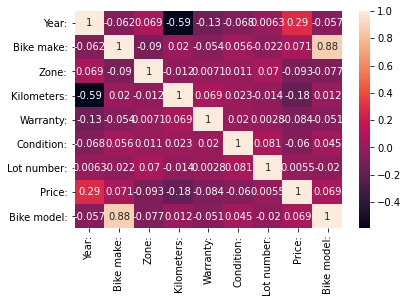

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(corr_mat,annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['Bike make:'] = le.fit_transform(df['Bike make:'].values)
df['Zone:'] = le.fit_transform(df['Zone:'].values)
df['Warranty:'] = le.fit_transform(df['Warranty:'].values)
df['Condition:'] = le.fit_transform(df['Condition:'].values)
df['Bike model:'] = le.fit_transform(df['Bike model:'].values)



In [38]:
X = df.drop(columns=['Price:'])
y = df['Price:'].values.reshape(-1,1)

In [39]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [40]:
y = y/10000 #y scaled by 10k

In [41]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LinearRegression
regression  = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = regression.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [52]:
y_pred.shape

(420, 1)

In [53]:
regression.score(X_test,y_test)

0.10841440400255675

In [61]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse)

Mean Square Error :  129.64184593359818


In [ ]:
#BOSTON HOUSE PRIce